###  NAME    :  SAIFULLAH RAJPUT 
###  ROLL_NO :   379693
###  PROJECT 03

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import glob
import os
import missingno as msno
import geopandas as gpd

######  Importing Data from  "" https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india ""

In [6]:
folder_path = 'Data'  
dataframes = [pd.read_csv(file, low_memory=False) for file in csv_files]

In [5]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

In [7]:
df = pd.concat(dataframes, ignore_index=True)

In [8]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Datetime,StationId,StationName,State,Status
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,...,0.00,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,...,3.68,5.50,3.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,...,6.80,16.40,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,...,4.43,10.14,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,...,7.01,18.89,2.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,...,5.42,10.83,1.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(3434754, 21)

In [11]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Datetime',
       'StationId', 'StationName', 'State', 'Status'],
      dtype='object')

In [12]:
df.isnull().sum()

City           2697118
Date           3297188
PM2.5           819230
PM10           1470065
NO              691261
NO2             666457
NOx             633947
NH3            1567823
CO              601106
SO2             902398
O3              885001
Benzene        1062533
Toluene        1309946
Xylene         2634409
AQI             725191
AQI_Bucket      725191
Datetime        137796
StationId       737406
StationName    3434524
State          3434524
Status         3434621
dtype: int64

In [9]:
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
                'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

categorical_cols = ['City', 'Date', 'AQI_Bucket', 'Datetime',
                    'StationId', 'StationName', 'State', 'Status']

In [10]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
   df[col] = df[col].fillna('Unknown')

In [11]:
df.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
Datetime       0
StationId      0
StationName    0
State          0
Status         0
dtype: int64

In [15]:
df.shape

(3434754, 21)

### HIGHEST AVERAGE AQI CITIES 

In [13]:

city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

#Top 10 cities with highest average AQI
city_aqi.head(10)


City
Ahmedabad       336.767320
Delhi           258.674715
Lucknow         212.128052
Patna           207.809837
Gurugram        207.594573
Unknown         168.503991
Talcher         161.252220
Jorapokhar      147.547457
Brajrajnagar    144.450506
Guwahati        139.955458
Name: AQI, dtype: float64

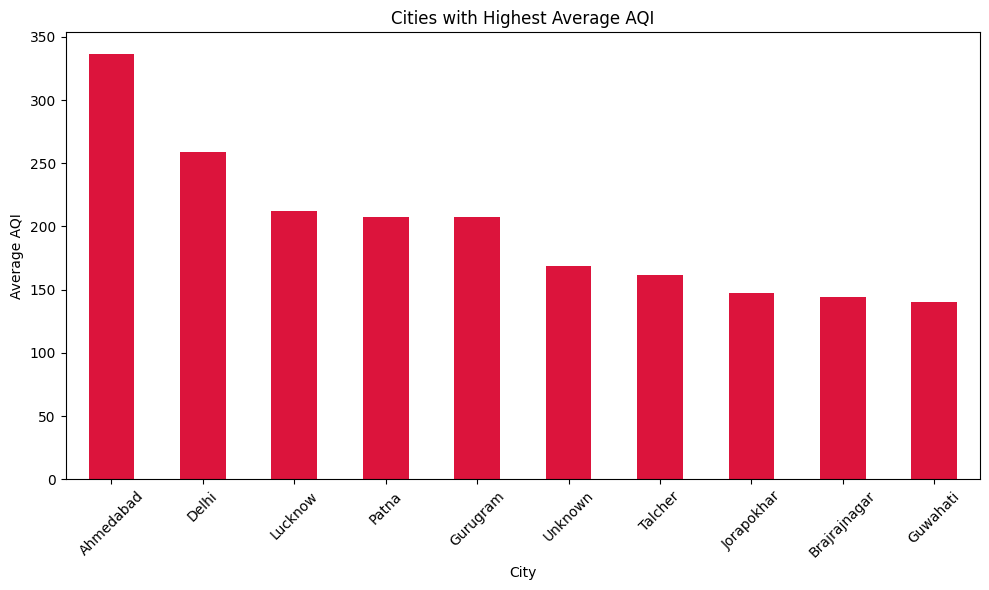

In [14]:

city_aqi.head(10).plot(kind='bar', figsize=(10, 6), color='crimson')
plt.title('Cities with Highest Average AQI')
plt.ylabel('Average AQI')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
# Ahmedabad as we can see in the above bar chart

In [35]:
print(df['Datetime'].dropna().head(10).tolist())


[Timestamp('2015-01-01 01:00:00'), Timestamp('2015-01-01 02:00:00'), Timestamp('2015-01-01 03:00:00'), Timestamp('2015-01-01 04:00:00'), Timestamp('2015-01-01 05:00:00'), Timestamp('2015-01-01 06:00:00'), Timestamp('2015-01-01 07:00:00'), Timestamp('2015-01-01 08:00:00'), Timestamp('2015-01-01 09:00:00'), Timestamp('2015-01-01 10:00:00')]


In [36]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


In [37]:

df['Month'] = df['Datetime'].dt.month_name()





In [38]:
monthly_aqi = df.groupby('Month')['AQI'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

print(monthly_aqi)


Month
January      224.568101
February     195.786866
March        154.777428
April        147.701542
May          147.970948
June         130.046972
July         114.597230
August       110.554136
September    113.388772
October      182.646378
November     242.512475
December     233.309022
Name: AQI, dtype: float64


#### VISUALIZING AND UNDERSTANDING HOW AQI VARIES BY THE HELP OF BAR CHART BELOW

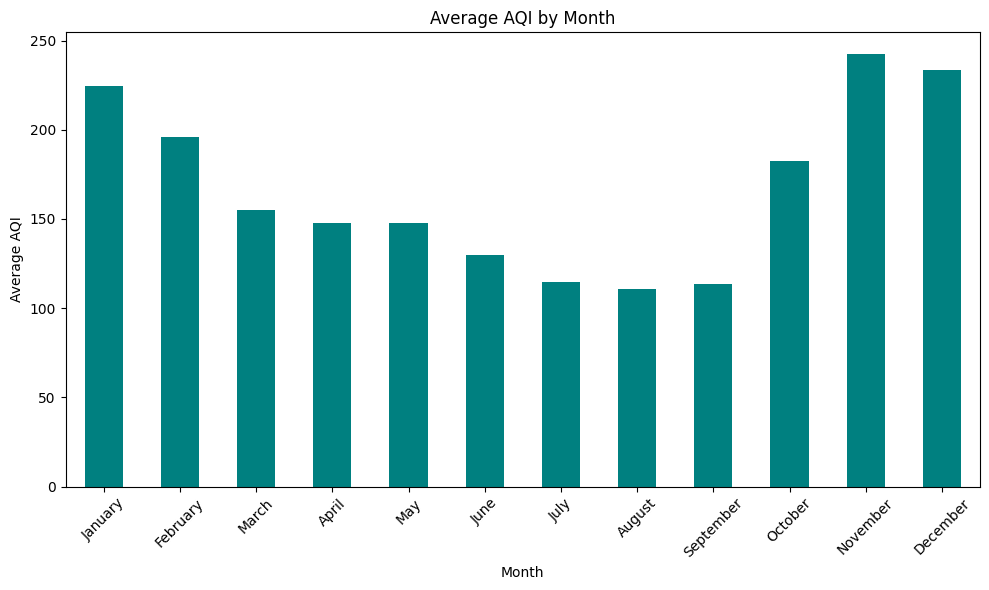

In [39]:
monthly_aqi.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Average AQI by Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###### HOW IT VARIES IN DIFFERENT SEASONS FOR BETTER UNDERSTANDING

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Datetime'].dt.month.apply(get_season)

seasonal_aqi = df.groupby('Season')['AQI'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
print(seasonal_aqi)


Season
Winter    217.763382
Spring    150.144553
Summer    119.505620
Autumn    178.146061
Name: AQI, dtype: float64


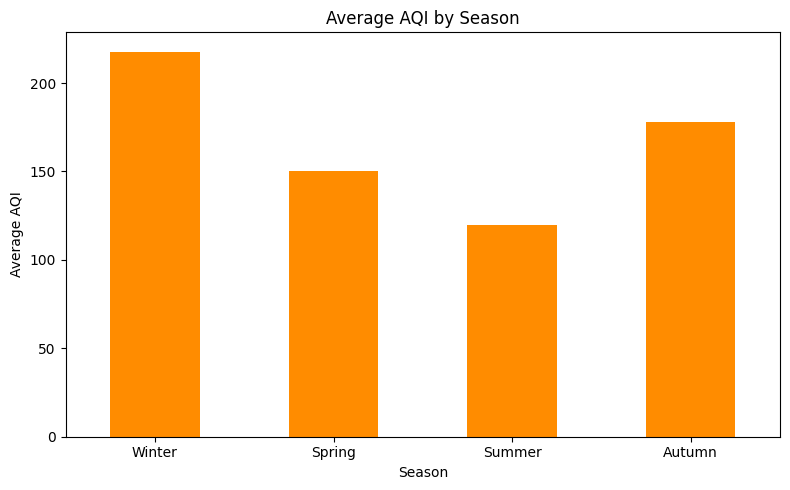

In [41]:
seasonal_aqi.plot(kind='bar', figsize=(8, 5), color='darkorange')
plt.title('Average AQI by Season')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### POLLUTANTS 

In [14]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']


In [15]:
average_levels = df[pollutants].mean().sort_values(ascending=False)
print(average_levels)


PM10       132.627276
PM2.5       71.488363
NOx         35.769408
O3          34.236435
NO2         31.878851
NH3         24.382290
NO          18.751101
SO2         11.458136
Toluene      9.512719
Benzene      2.543301
CO           1.511503
Xylene       0.937004
dtype: float64


###### SPLITTING FOR GOOD UNDERSTANDING

In [55]:
for pollutant, avg in average_levels.items():
    print(f"{pollutant}: {avg:.2f}")


PM10: 132.63
PM2.5: 71.49
NOx: 35.77
O3: 34.24
NO2: 31.88
NH3: 24.38
NO: 18.75
SO2: 11.46
Toluene: 9.51
Benzene: 2.54
CO: 1.51
Xylene: 0.94


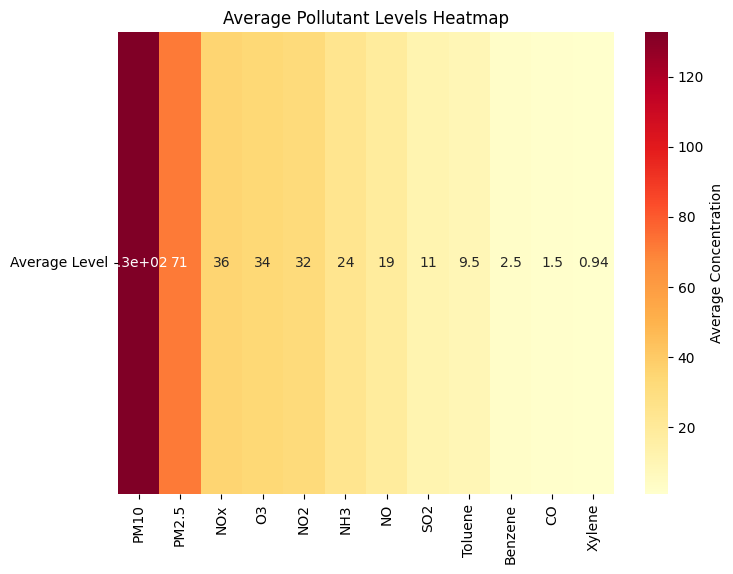

In [56]:
avg_df = pd.DataFrame(average_levels, columns=['Average Level'])

plt.figure(figsize=(8, 6))
sns.heatmap(avg_df.T, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Average Concentration'})
plt.title('Average Pollutant Levels Heatmap')
plt.yticks(rotation=0)
plt.show()

##### TOP CITY WITH LOW POLLUTANTS IN AIR 

In [57]:

city_avg_aqi = df.groupby('City')['AQI'].mean()


cleanest_city = city_avg_aqi.idxmin()
cleanest_aqi = city_avg_aqi.min()

print(f"The cleanest city on average is {cleanest_city} with an average AQI of {cleanest_aqi:.2f}")


The cleanest city on average is Aizawl with an average AQI of 40.59


In [58]:
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_percent})
print(missing_summary)


             Missing Count  Missing %
City                     0   0.000000
Date                     0   0.000000
PM2.5                    0   0.000000
PM10                     0   0.000000
NO                       0   0.000000
NO2                      0   0.000000
NOx                      0   0.000000
NH3                      0   0.000000
CO                       0   0.000000
SO2                      0   0.000000
O3                       0   0.000000
Benzene                  0   0.000000
Toluene                  0   0.000000
Xylene                   0   0.000000
AQI                      0   0.000000
AQI_Bucket               0   0.000000
Datetime            137796   4.011816
StationId                0   0.000000
StationName              0   0.000000
State                    0   0.000000
Status                   0   0.000000
YearMonth           137796   4.011816
Month               137796   4.011816
Season                   0   0.000000


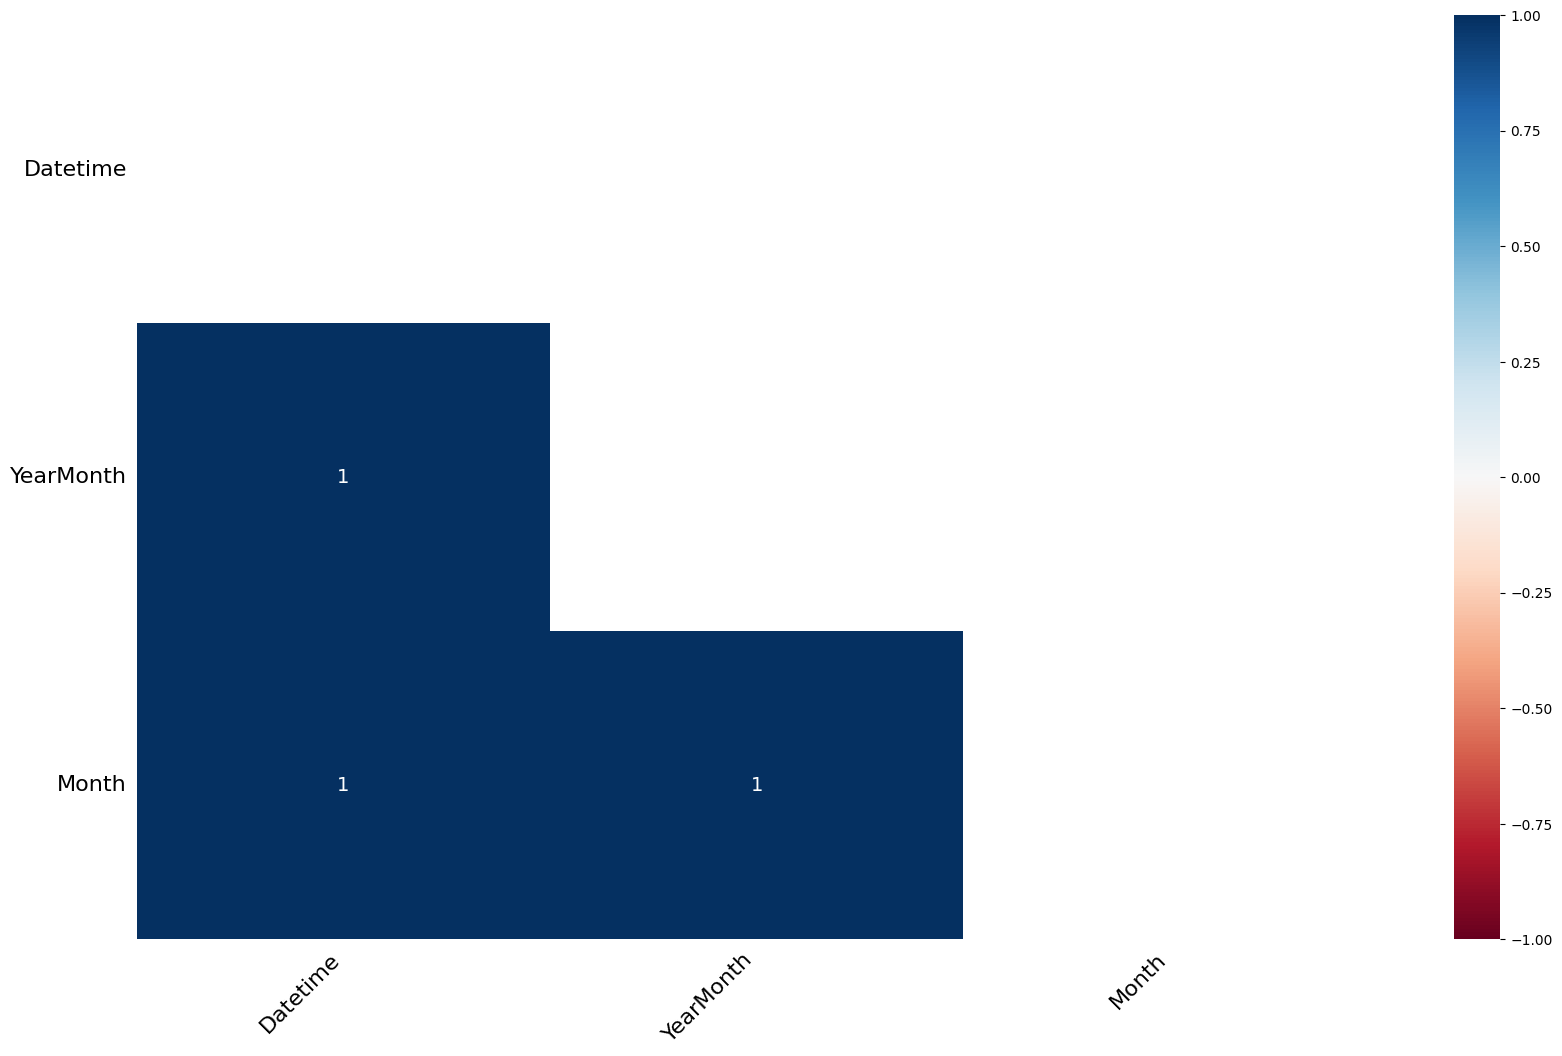

In [59]:
msno.heatmap(df)

plt.show()


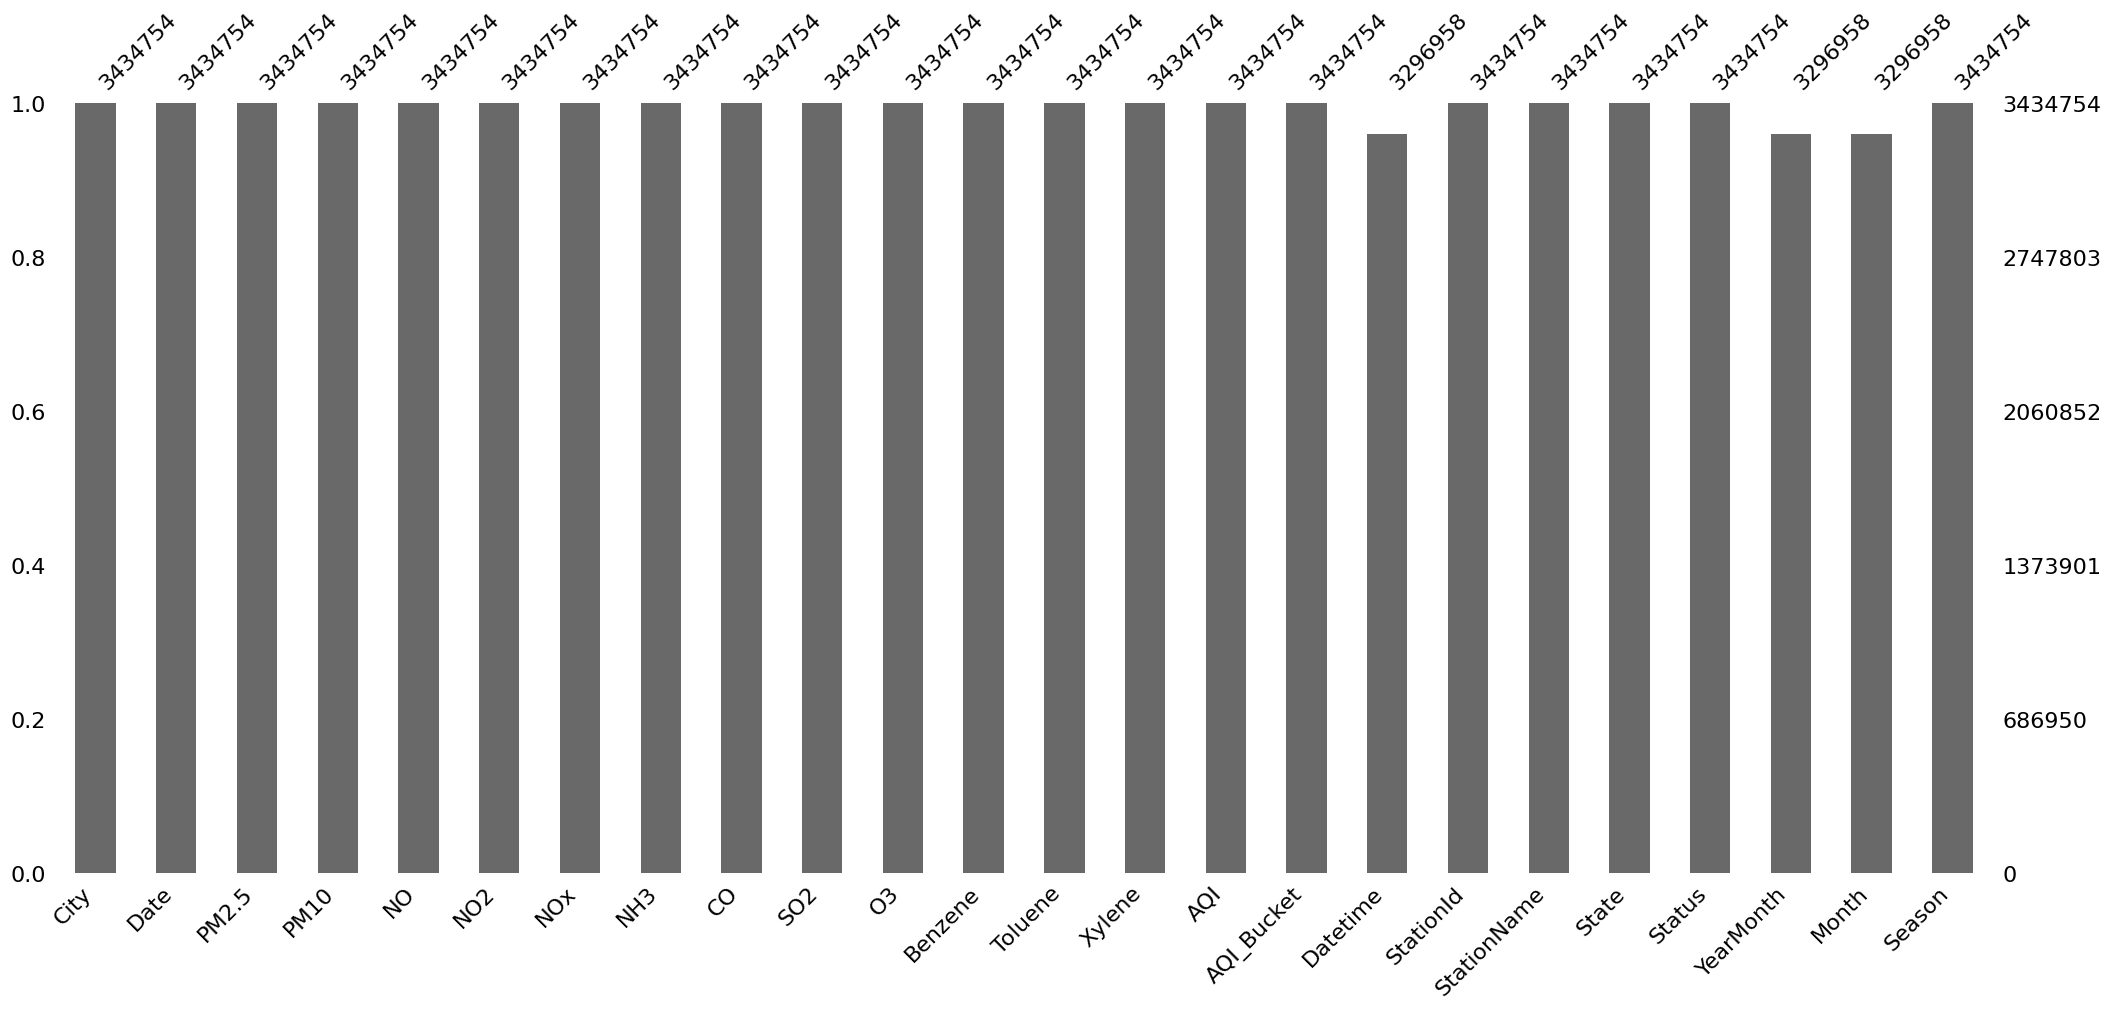

In [60]:
msno.bar(df)
plt.show()


In [61]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M', errors='coerce')


In [62]:
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
# Monday=0    Sunday=6


In [63]:

avg_aqi_daytype = df.groupby('DayType')['AQI'].mean()
print(avg_aqi_daytype)


DayType
Weekday    167.413381
Weekend    164.150131
Name: AQI, dtype: float64


###### COMPARING POLLUTANTS FOR UNDERSTANDING 

In [64]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

avg_pollutants_daytype = df.groupby('DayType')[pollutants].mean()
print(avg_pollutants_daytype)


             PM2.5        PM10        NO2        CO        SO2         O3
DayType                                                                  
Weekday  72.096667  133.555436  32.242510  1.528750  11.511595  34.259304
Weekend  69.879999  130.173207  30.917332  1.465901  11.316788  34.175968


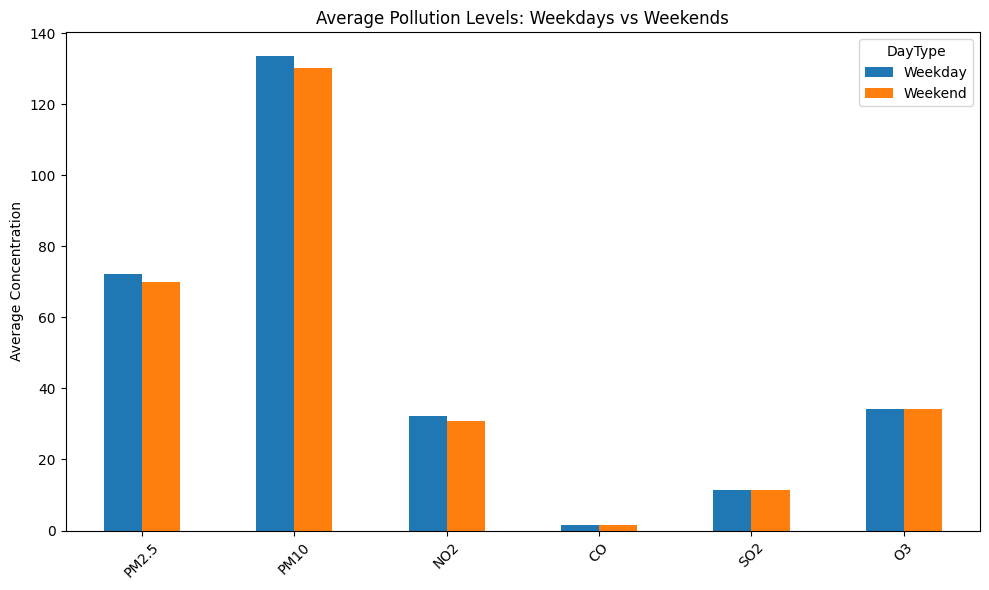

In [65]:
avg_pollutants_daytype.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Pollution Levels: Weekdays vs Weekends')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## PART 02 OF PROJECT VISUALIZATION 

###### Bar chart of Top 10 most polluted cities by AQI.

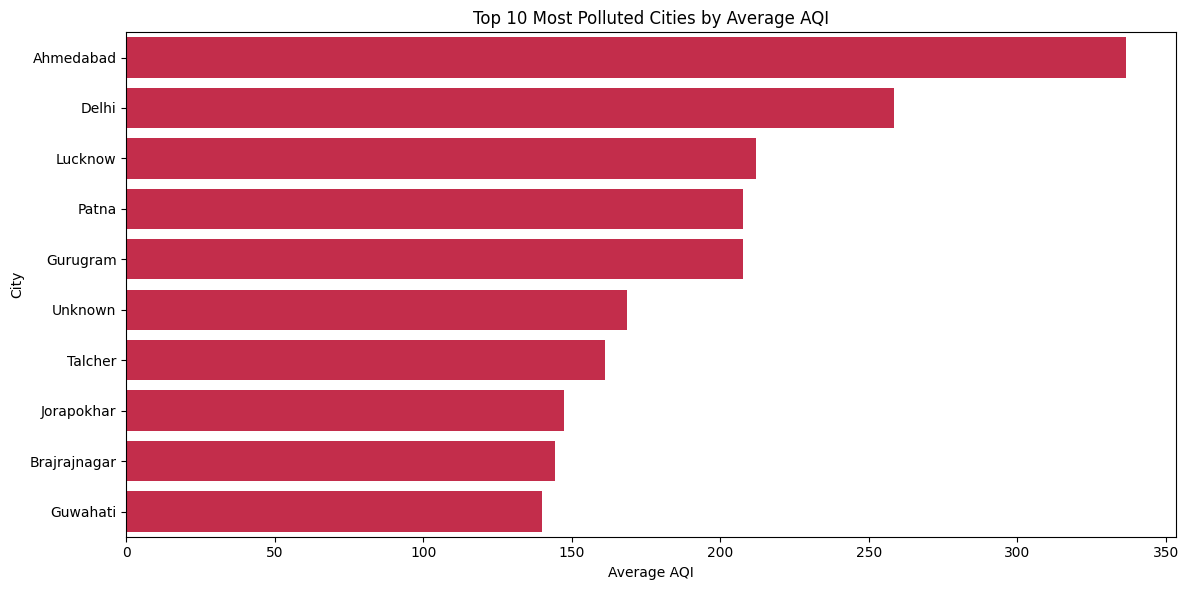

In [111]:
# I already Showed Above Let's see it


city_avg_aqi = df.groupby('City')['AQI'].mean()

top10_cities = city_avg_aqi.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_cities.values, y=top10_cities.index, color='crimson')


plt.title('Top 10 Most Polluted Cities by Average AQI')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.tight_layout()
plt.show()



### Line plot showing monthly AQI trends for selected cities.

In [28]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['YearMonth'] = df['Datetime'].dt.to_period('M')



In [35]:
# List of cities to select
selected_cities = [ 'Ahmeadabad','Lucknow','Guwahati','Jorapokhar']
df_selected = df[df['City'].isin(selected_cities)]


In [36]:
monthly_aqi = df_selected.groupby(['City', 'YearMonth'])['AQI'].mean().reset_index()

In [37]:
# Convert 'YearMonth' back to timestamp for plotting
monthly_aqi['YearMonth'] = monthly_aqi['YearMonth'].dt.to_timestamp()

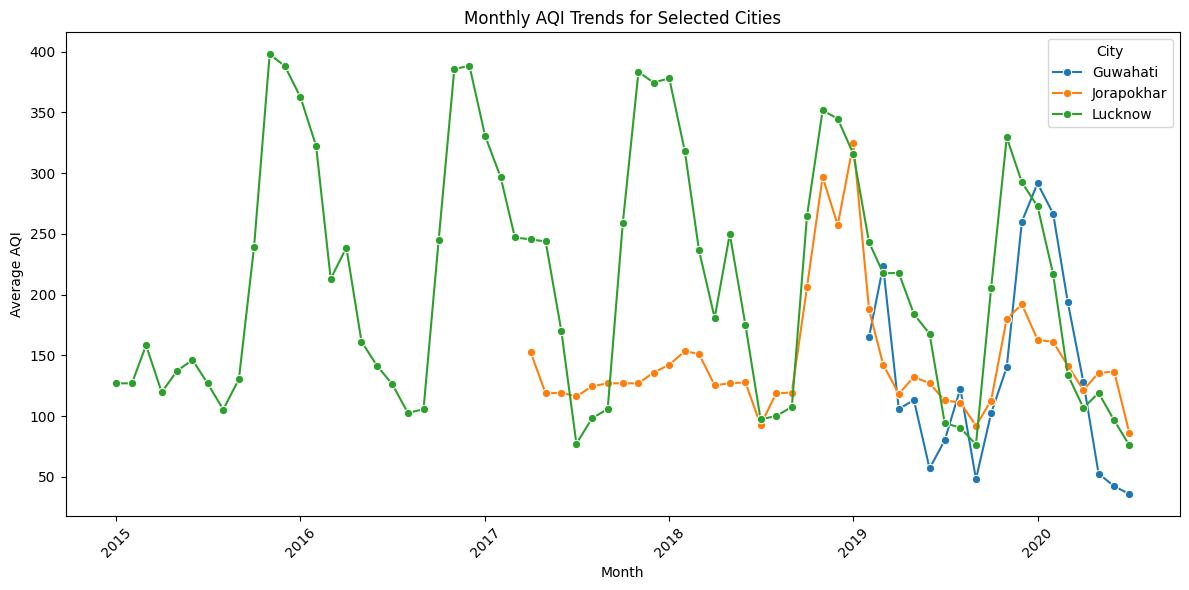

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aqi, x='YearMonth', y='AQI', hue='City', marker='o')

plt.title('Monthly AQI Trends for Selected Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()


###  HEATMAP SHOWING CORRELATION BETWEN DIFFERENT POLLUTANTS

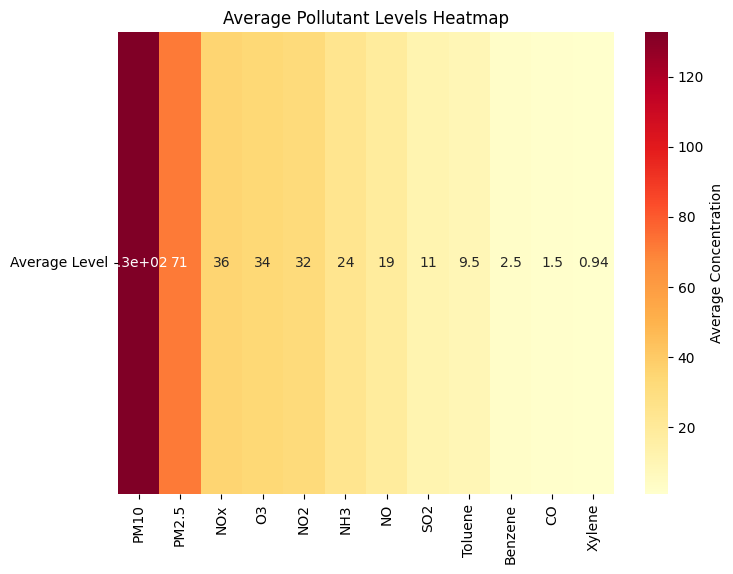

In [124]:
avg_df = pd.DataFrame(average_levels, columns=['Average Level'])

plt.figure(figsize=(8, 6))
sns.heatmap(avg_df.T, annot=True, cmap='YlOrRd', cbar_kws={'label': 'Average Concentration'})
plt.title('Average Pollutant Levels Heatmap')
plt.yticks(rotation=0)
plt.show()

##### Seasonal comparison plot of average AQI levels. Already Did Above But Doing Again to show

In [42]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Datetime'].dt.month.apply(get_season)

seasonal_aqi = df.groupby('Season')['AQI'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
print(seasonal_aqi)


Season
Winter    217.763382
Spring    150.144553
Summer    119.505620
Autumn    178.146061
Name: AQI, dtype: float64


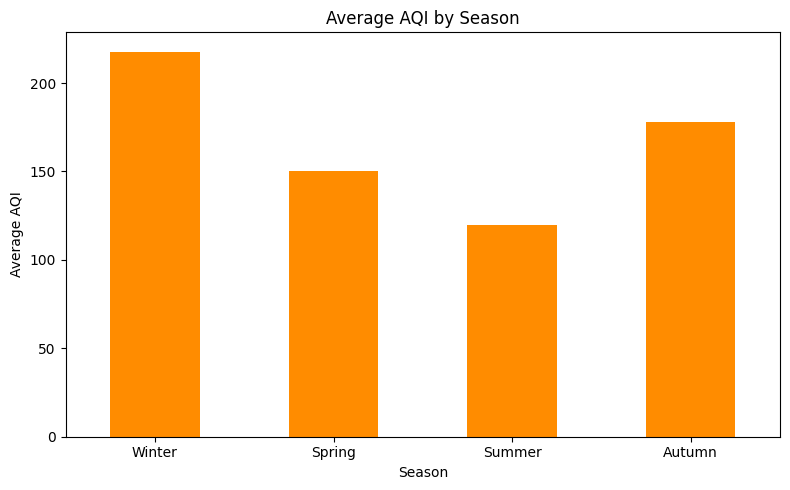

In [43]:
seasonal_aqi.plot(kind='bar', figsize=(8, 5), color='darkorange')
plt.title('Average AQI by Season')
plt.ylabel('Average AQI')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Stacked bar chart of pollutant contributions in different cities.

In [18]:
pollutant_by_city = df.groupby('City')[pollutants].mean().fillna(0)  
# First using Mean to Visualize and understand 


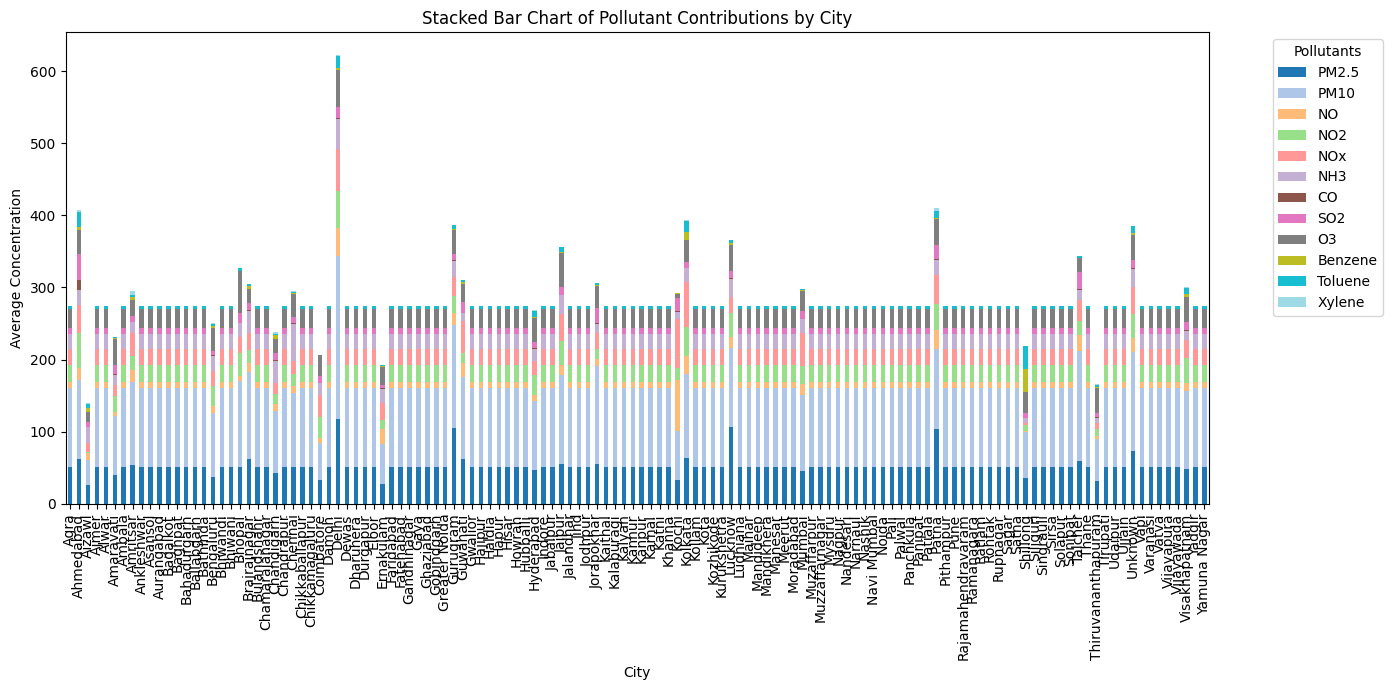

In [19]:
pollutant_by_city.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Stacked Bar Chart of Pollutant Contributions by City')
plt.xlabel('City')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutants', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###### NOW WITH PERCENTAGE

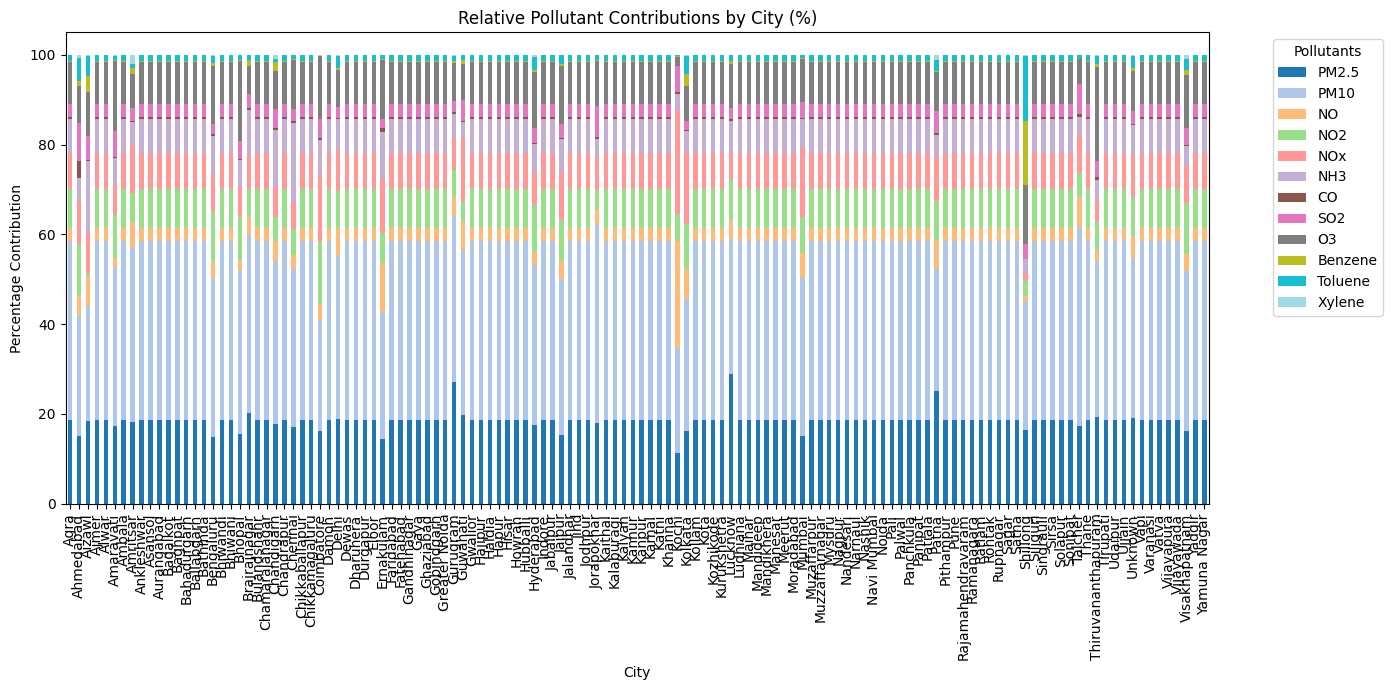

In [20]:
pollutant_percent = pollutant_by_city.div(pollutant_by_city.sum(axis=1), axis=0) * 100

pollutant_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

plt.title('Relative Pollutant Contributions by City (%)')
plt.ylabel('Percentage Contribution')
plt.xlabel('City')
plt.legend(title='Pollutants', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [21]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Datetime',
       'StationId', 'StationName', 'State', 'Status'],
      dtype='object')

In [23]:
city_aqi = df.groupby('City')['AQI'].mean().reset_index()


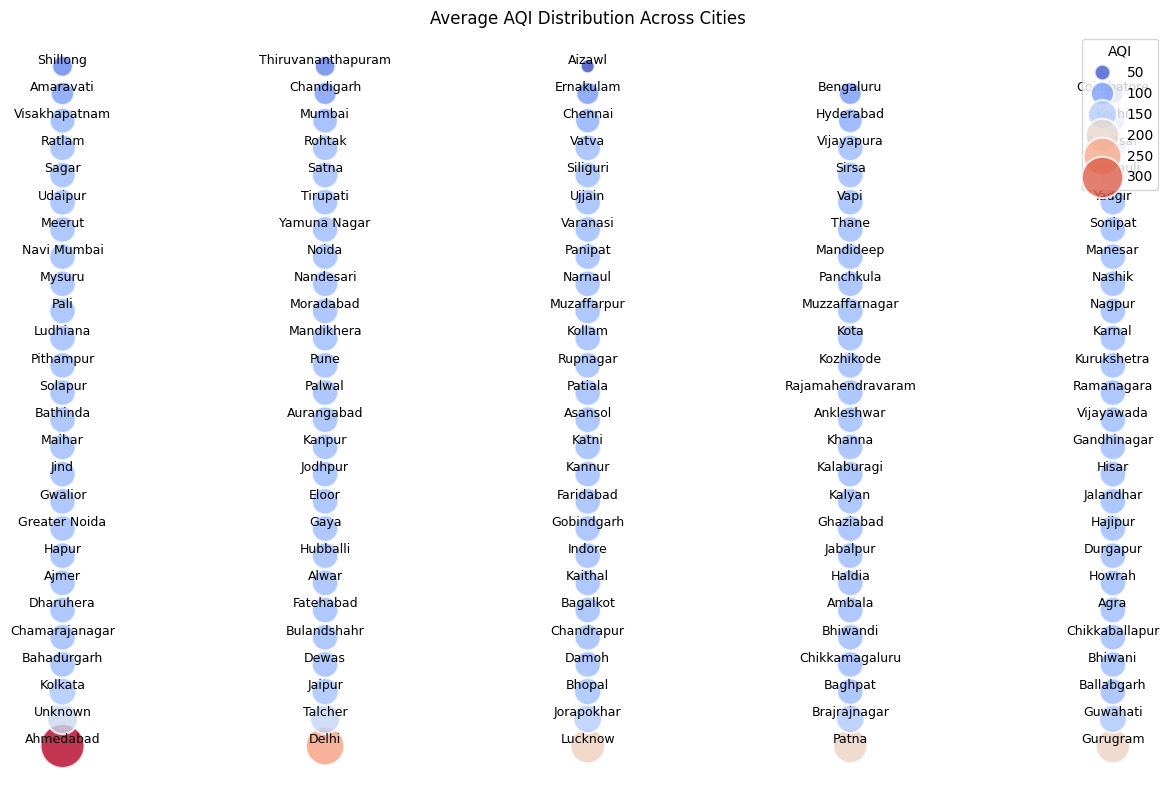

In [25]:


city_aqi = city_aqi.sort_values('AQI', ascending=False).reset_index(drop=True)
city_aqi['x'] = np.tile(range(5), len(city_aqi) // 5 + 1)[:len(city_aqi)]
city_aqi['y'] = np.repeat(range(len(city_aqi) // 5 + 1), 5)[:len(city_aqi)]


plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=city_aqi,
    x='x',
    y='y',
    hue='AQI',
    size='AQI',
    sizes=(100, 1000),
    palette='coolwarm',
    legend='brief',
    alpha=0.8
)


for i, row in city_aqi.iterrows():
    plt.text(row['x'], row['y'] + 0.1, row['City'], ha='center', fontsize=9)


plt.axis('off')
plt.title('Average AQI Distribution Across Cities')
plt.tight_layout()
plt.show()


In [45]:

top_cities = df['City'].value_counts().head(10).index

filtered_df = df[df['City'].isin(top_cities)]


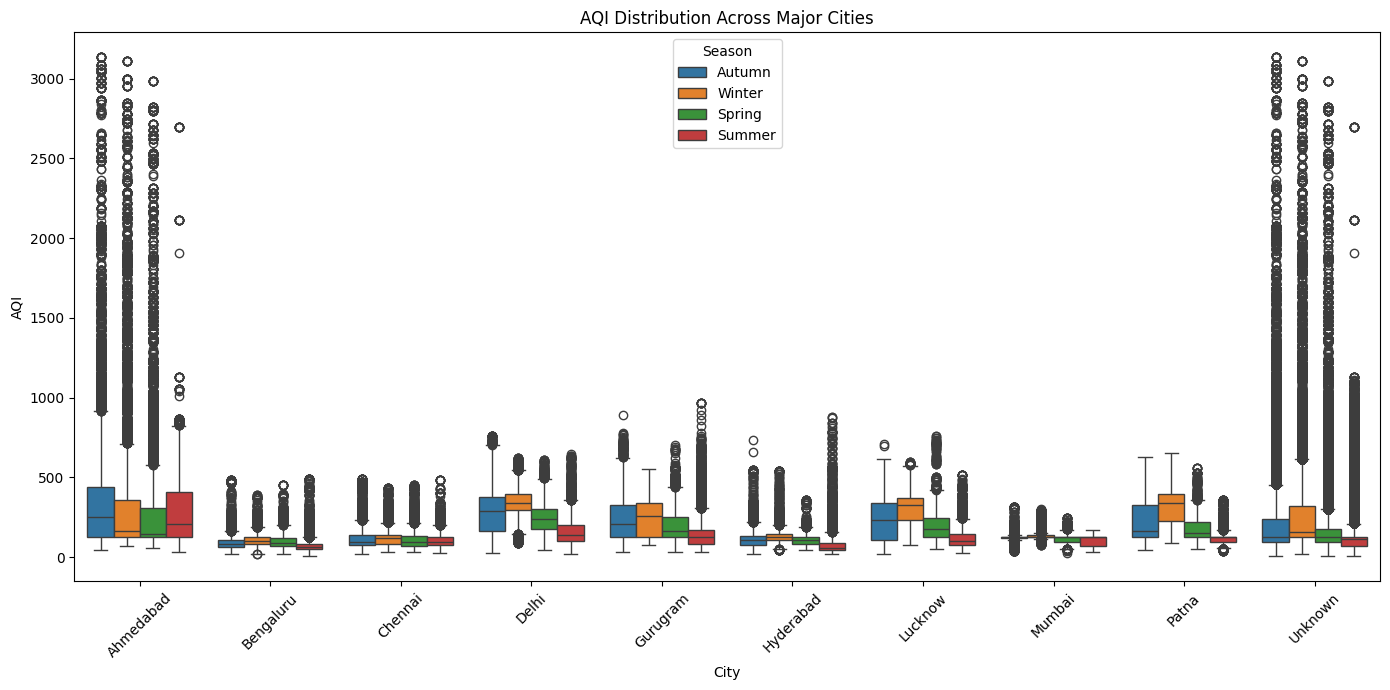

In [48]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=filtered_df, x='City', y='AQI', hue='Season')


plt.title('AQI Distribution Across Major Cities')
plt.xlabel('City')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🏁